In [251]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
import seaborn as sns
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

Read Data

In [252]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [253]:
df = pd.read_csv('/content/drive/MyDrive/Disease Data/dataset.csv')
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [254]:
del df['Symptom_7']   
del df['Symptom_8']   
del df['Symptom_9']   
del df['Symptom_10']   
del df['Symptom_11']   
del df['Symptom_12']   
del df['Symptom_13']   
del df['Symptom_14']   
del df['Symptom_15']   
del df['Symptom_16']
del df['Symptom_17']

In [255]:
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN


Dataset characteristics

In [256]:
df.describe()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6
count,4920,4920,4920,4920,4572,3714,2934
unique,41,34,48,54,50,38,32
top,Jaundice,vomiting,vomiting,fatigue,high_fever,headache,nausea
freq,120,822,870,726,378,348,390


In [257]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Disease    4920 non-null   object
 1   Symptom_1  4920 non-null   object
 2   Symptom_2  4920 non-null   object
 3   Symptom_3  4920 non-null   object
 4   Symptom_4  4572 non-null   object
 5   Symptom_5  3714 non-null   object
 6   Symptom_6  2934 non-null   object
dtypes: object(7)
memory usage: 269.2+ KB


Check for null and NaN values

In [258]:
df.isnull().sum()

Disease         0
Symptom_1       0
Symptom_2       0
Symptom_3       0
Symptom_4     348
Symptom_5    1206
Symptom_6    1986
dtype: int64

Text(0, 0.5, 'Number')

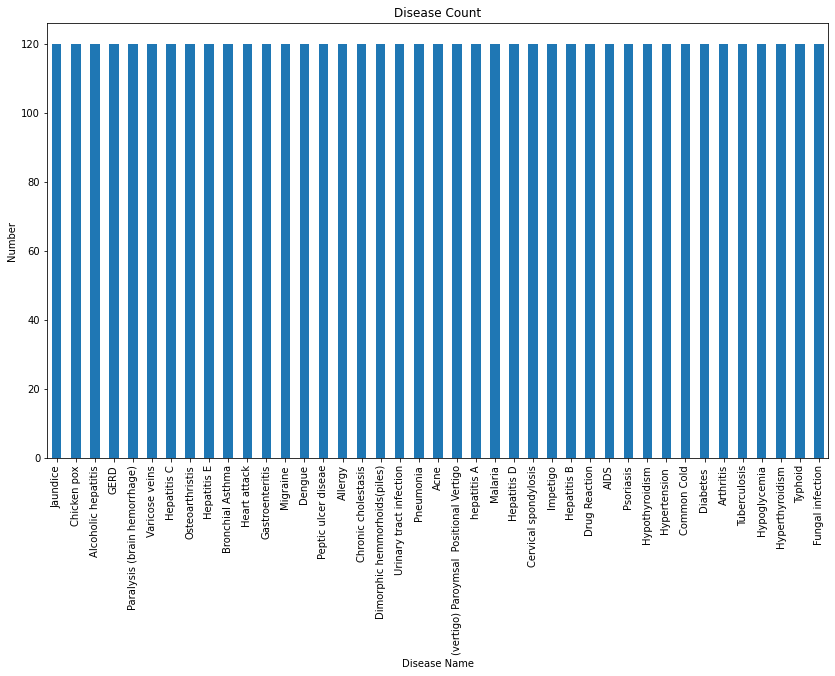

In [259]:
ax = df['Disease'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Disease Count")
ax.set_xlabel("Disease Name")
ax.set_ylabel("Number")

Text(0, 0.5, 'Number')

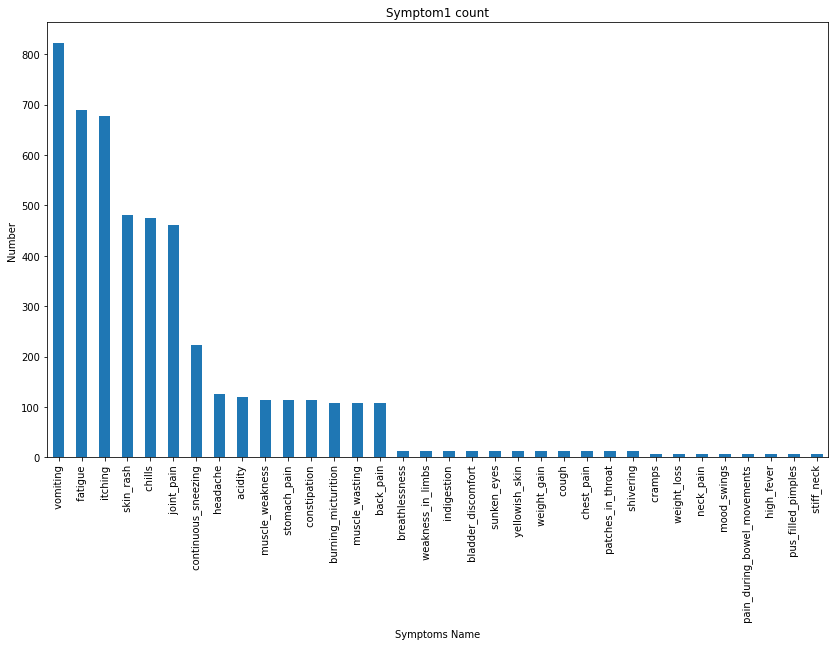

In [260]:
ax = df['Symptom_1'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Symptom1 count")
ax.set_xlabel("Symptoms Name")
ax.set_ylabel("Number")

In [ ]:
ax = df['Symptom_2'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Symptom2 count")
ax.set_xlabel("Symptoms Name")
ax.set_ylabel("Number")

Text(0, 0.5, 'Number')

In [ ]:
ax = df['Symptom_3'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Symptom3 count")
ax.set_xlabel("Symptoms Name")
ax.set_ylabel("Number")

In [ ]:
ax = df['Symptom_4'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Symptom4 count")
ax.set_xlabel("Symptoms Name")
ax.set_ylabel("Number")

In [ ]:
ax = df['Symptom_5'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Symptom5 count")
ax.set_xlabel("Symptoms Name")
ax.set_ylabel("Number")

In [ ]:
ax = df['Symptom_6'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Symptom6 count")
ax.set_xlabel("Symptoms Name")
ax.set_ylabel("Number")

Remove the trailing space from the symptom columns

In [ ]:
cols = df.columns
data = df[cols].values.flatten()

s = pd.Series(data)
s = s.str.strip()
s = s.values.reshape(df.shape)

df = pd.DataFrame(s, columns=df.columns)
df.head()

RelPlot

In [ ]:

sns.catplot(data=df, x='Symptom_1', y='Disease', height=8.27, aspect=50/8.27)

In [ ]:

sns.catplot(data=df, x='Symptom_2', y='Disease', height=8.27, aspect=50/8.27)

In [ ]:

sns.catplot(data=df, x='Symptom_3', y='Disease', height=8.27, aspect=50/8.27)

In [ ]:

sns.catplot(data=df, x='Symptom_4', y='Disease', height=8.27, aspect=50/8.27)

In [ ]:

sns.catplot(data=df, x='Symptom_5', y='Disease', height=8.27, aspect=50/8.27)

In [ ]:

sns.catplot(data=df, x='Symptom_6', y='Disease', height=8.27, aspect=50/8.27)

Fill the NaN values with zero

In [ ]:
df = df.fillna(0)
df.head()

Read Symptom severity rank file

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/Disease Data/Symptom-severity.csv')
df1.head()

Get overall list of symptoms

In [ ]:
df1['Symptom'].unique()

Encode symptoms in the data with the symptom rank

In [ ]:
vals = df.values
symptoms = df1['Symptom'].unique()

for i in range(len(symptoms)):
    vals[vals == symptoms[i]] = df1[df1['Symptom'] == symptoms[i]]['weight'].values[0]
    
d = pd.DataFrame(vals, columns=cols)
d.head()

Assign symptoms with no rank to zero

In [ ]:
d = d.replace('dischromic _patches', 0)
d = d.replace('spotting_ urination',0)
df = d.replace('foul_smell_of urine',0)
df.head()

In [ ]:
df.describe()

Check if entire columns have zero values so we can drop those values

In [ ]:
(df[cols] == 0).all()

In [ ]:
df['Disease'].value_counts()

Get the names of diseases from data

In [ ]:
df['Disease'].unique()

Mean Avarage

In [ ]:
df.describe()

In [ ]:
sns.pairplot(df)

Correlation Matrix

In [ ]:
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [ ]:
sns.heatmap(df.corr(), annot = True, fmt = '.3f',
           cmap = 'viridis', center = 0)
plt.show()

data splitting

In [ ]:
data = df.iloc[:,1:].values
labels = df['Disease'].values

One-hot Encoding

In [ ]:
data1 = pd.get_dummies(data = df)
data1.head()

Select the features as symptoms column and label as Disease column

Split the data, labels with shuffle

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data1, labels, shuffle=True, train_size = 0.75)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

Initialize and train a Support vector classifier

In [ ]:
model = SVC()
model.fit(x_train, y_train)

In [ ]:
#Training_Accuracy
preds = model.predict(x_train)
print('F1-score% =', f1_score(y_train, preds, average='macro')*100, '|', 'Accuracy% =', accuracy_score(y_train, preds)*100)
precision = precision_score(y_train, preds,average='macro')*100
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_train, preds,average='macro')*100
print('Recall: %f' % recall)


In [ ]:
#Testing_Accuracy
preds = model.predict(x_test)
print('F1-score% =', f1_score(y_test, preds, average='macro')*100, '|', 'Accuracy% =', accuracy_score(y_test, preds)*100)
precision = precision_score(y_test, preds,average='macro')*100
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, preds,average='macro')*100
print('Recall: %f' % recall)

In [ ]:
from sklearn.metrics import plot_confusion_matrix

cm = confusion_matrix(y_test, preds, labels=df['Disease'].unique())

fig, ax = plt.subplots(figsize=(40, 40))
plot_confusion_matrix(model, x_test, y_test, normalize='true', cmap=plt.cm.Blues, ax=ax)
plt.show()

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf_b = RandomForestClassifier()
clf_b.fit(x_train, y_train)

In [ ]:
#Training_Accuracy
preds = clf_b.predict(x_train)
print('F1-score% =', f1_score(y_train, preds, average='macro')*100, '|', 'Accuracy% =', accuracy_score(y_train, preds)*100)
precision = precision_score(y_train, preds,average='macro')*100
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_train, preds,average='macro')*100
print('Recall: %f' % recall)

In [ ]:
#Testing_Accuracy
preds = clf_b.predict(x_test)
print('F1-score% =', f1_score(y_test, preds, average='macro')*100, '|', 'Accuracy% =', accuracy_score(y_test, preds)*100)
precision = precision_score(y_test, preds,average='macro')*100
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, preds,average='macro')*100
print('Recall: %f' % recall)

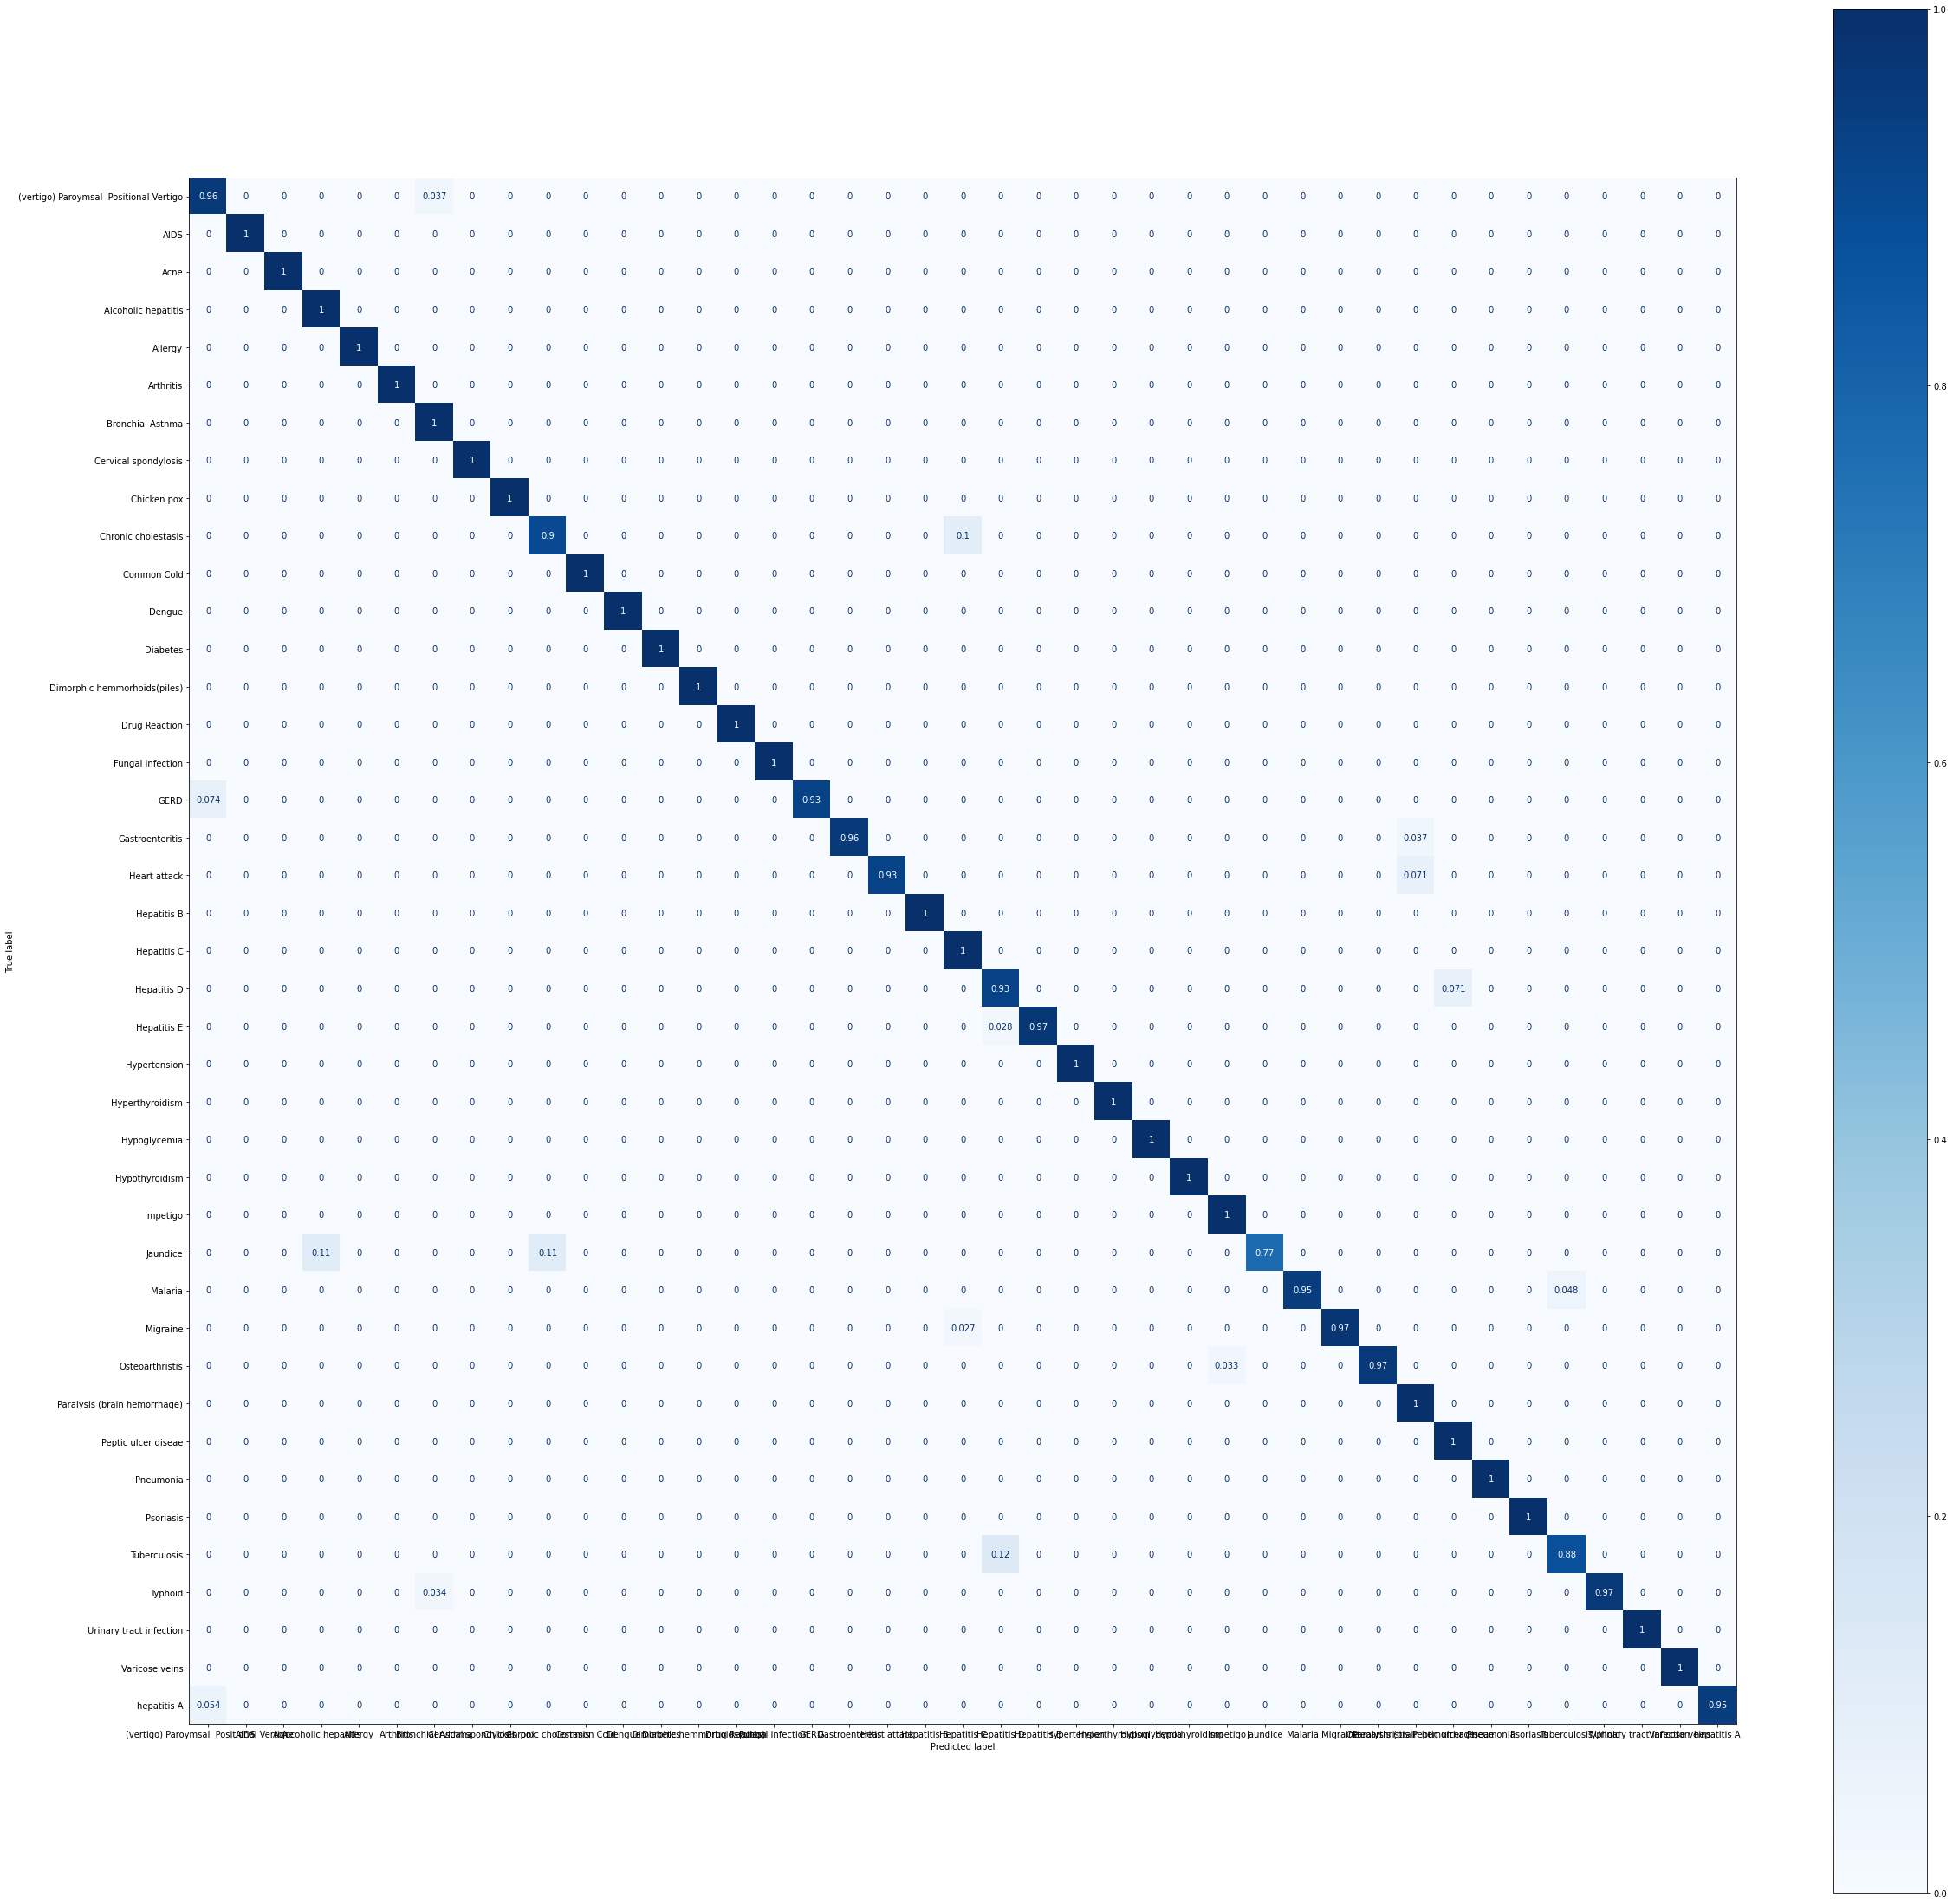

In [246]:
from sklearn.metrics import plot_confusion_matrix

cm = confusion_matrix(y_test, preds, labels=df['Disease'].unique())

fig, ax = plt.subplots(figsize=(40, 40))
plot_confusion_matrix(model, x_test, y_test, normalize='true', cmap=plt.cm.Blues, ax=ax)
plt.show()

Decision Tree

In [247]:
from sklearn import tree

clf_c = tree.DecisionTreeClassifier()
clf_c.fit(x_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [248]:
#Training_Accuracy
preds = clf_c.predict(x_train)
print('F1-score% =', f1_score(y_train, preds, average='macro')*100, '|', 'Accuracy% =', accuracy_score(y_train, preds)*100)
precision = precision_score(y_train, preds,average='macro')*100
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_train, preds,average='macro')*100
print('Recall: %f' % recall)

F1-score% = 100.0 | Accuracy% = 100.0
Precision: 100.000000
Recall: 100.000000


In [249]:
#Testing_Accuracy
preds = clf_c.predict(x_test)
print('F1-score% =', f1_score(y_test, preds, average='macro')*100, '|', 'Accuracy% =', accuracy_score(y_test, preds)*100)
precision = precision_score(y_test, preds,average='macro')*100
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, preds,average='macro')*100
print('Recall: %f' % recall)

F1-score% = 100.0 | Accuracy% = 100.0
Precision: 100.000000
Recall: 100.000000


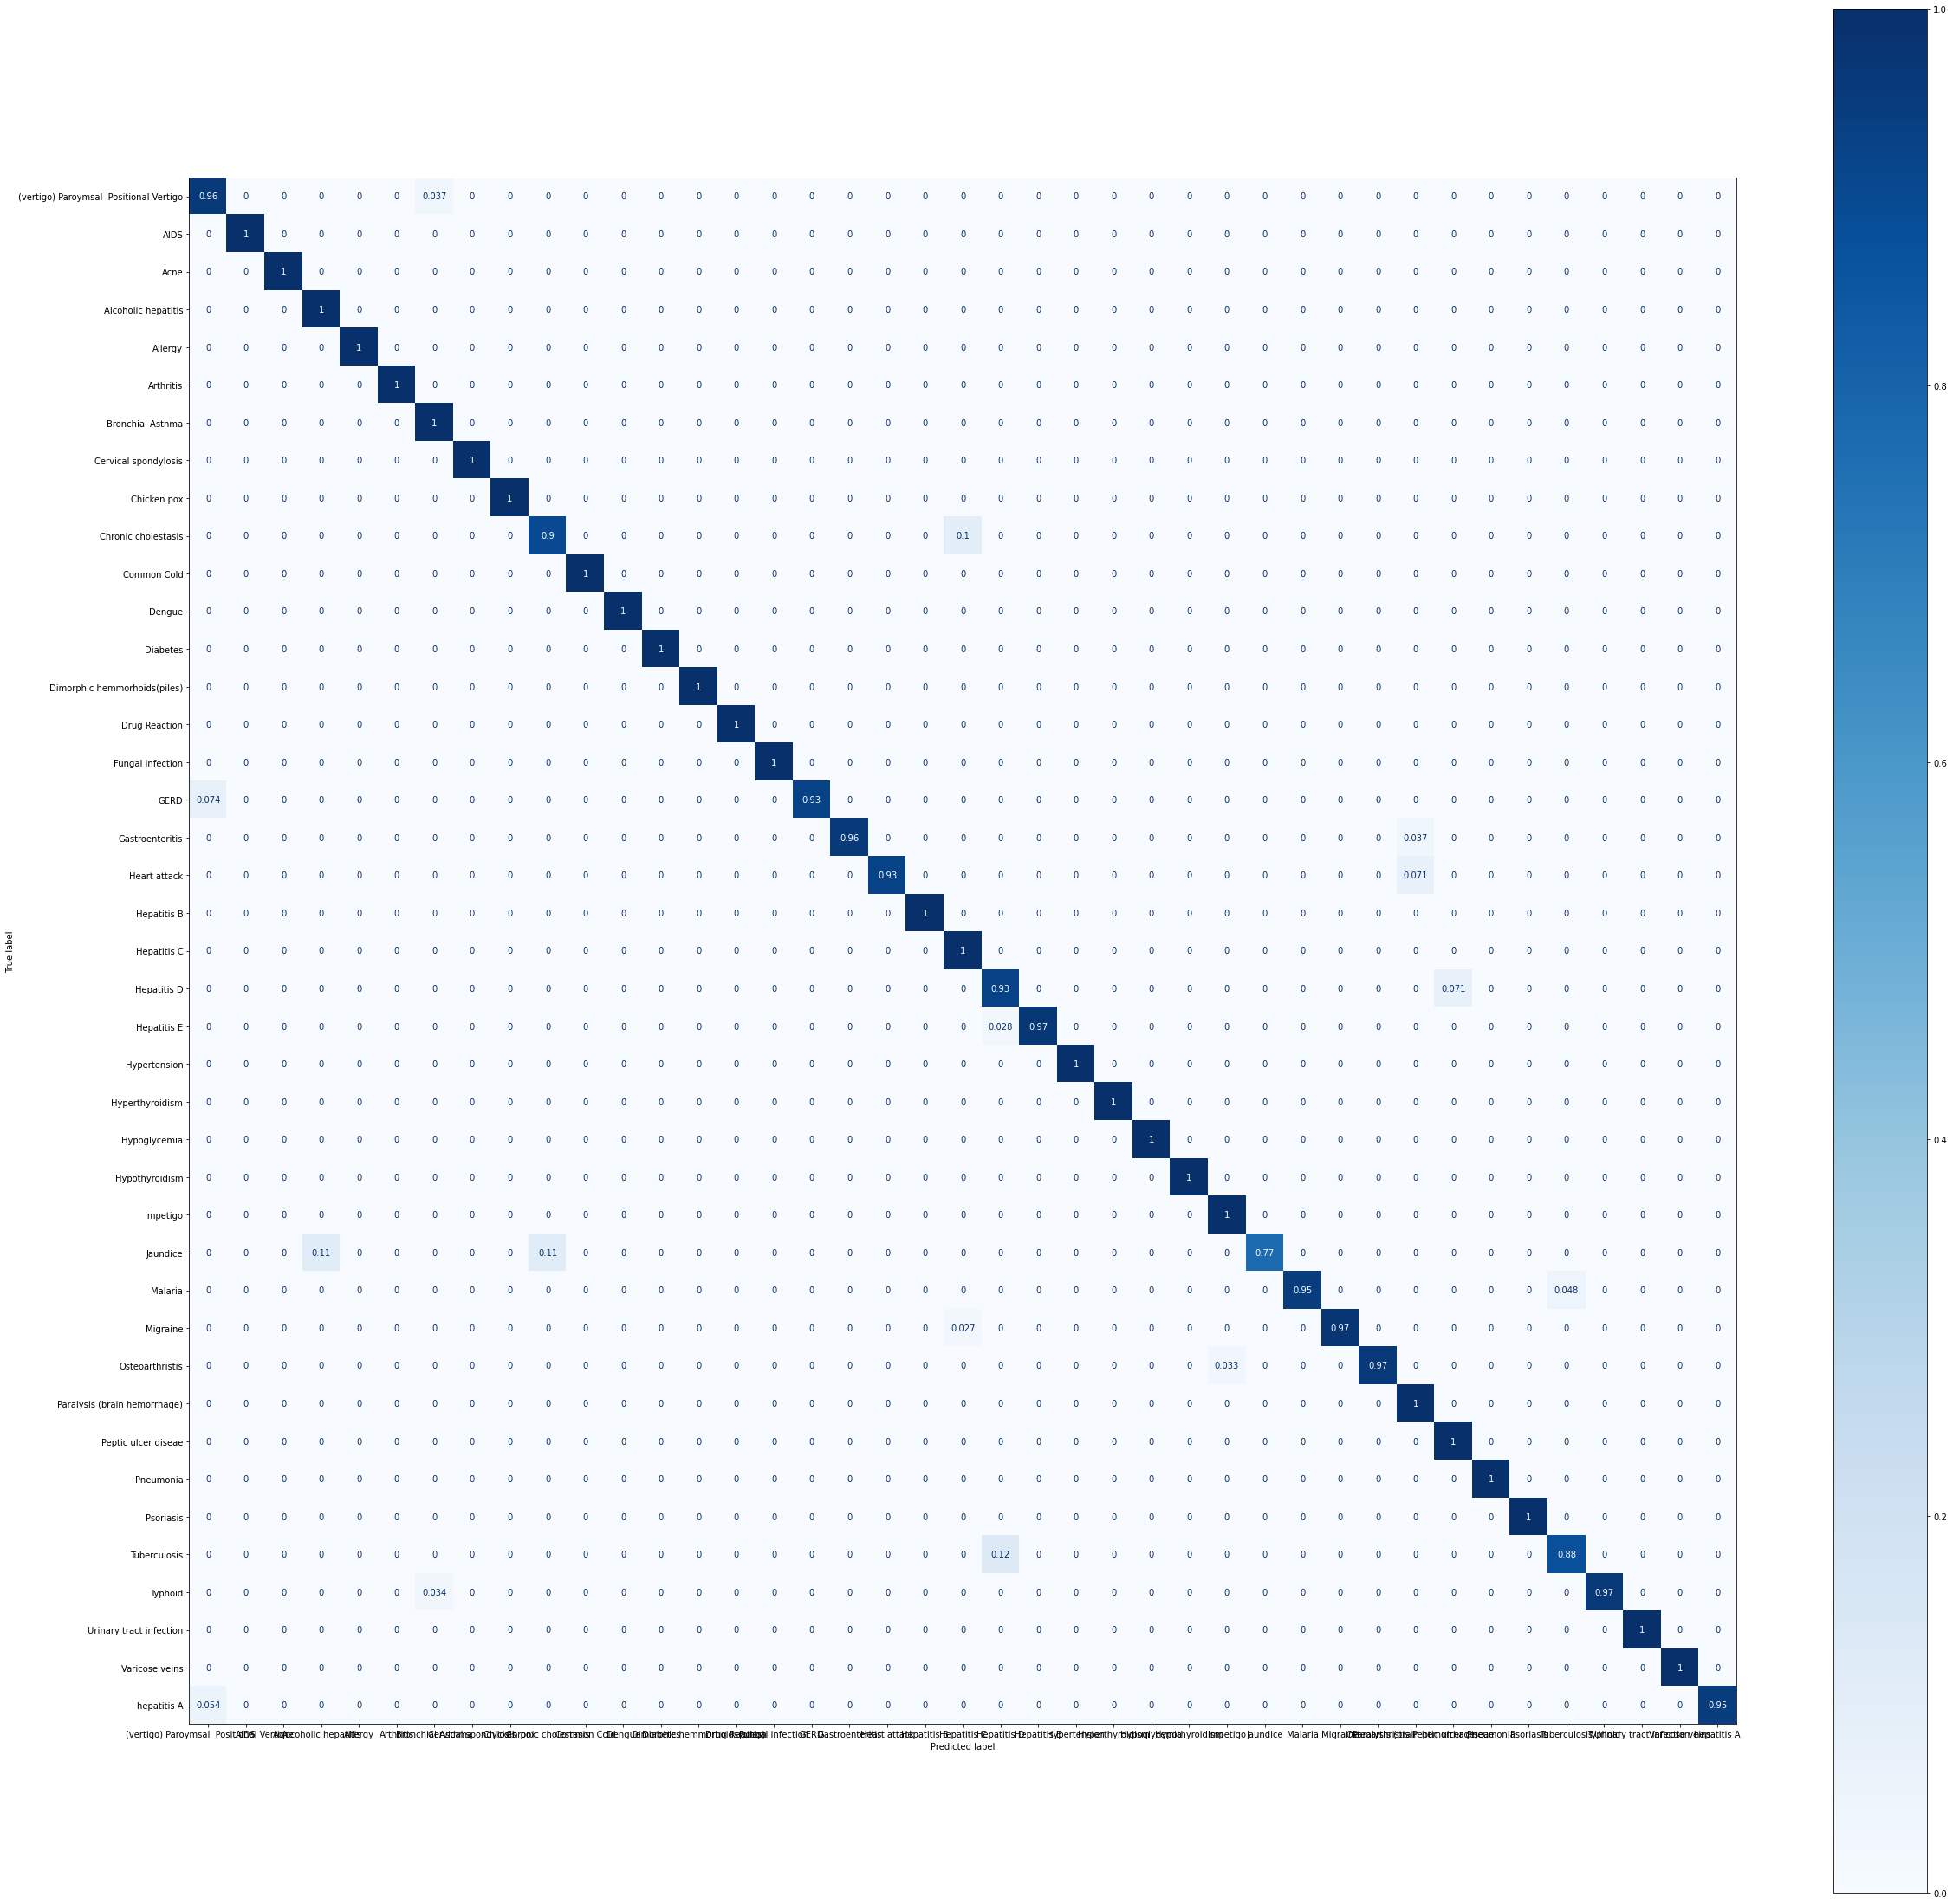

In [250]:
from sklearn.metrics import plot_confusion_matrix

cm = confusion_matrix(y_test, preds, labels=df['Disease'].unique())

fig, ax = plt.subplots(figsize=(40, 40))
plot_confusion_matrix(model, x_test, y_test, normalize='true', cmap=plt.cm.Blues, ax=ax)
plt.show()